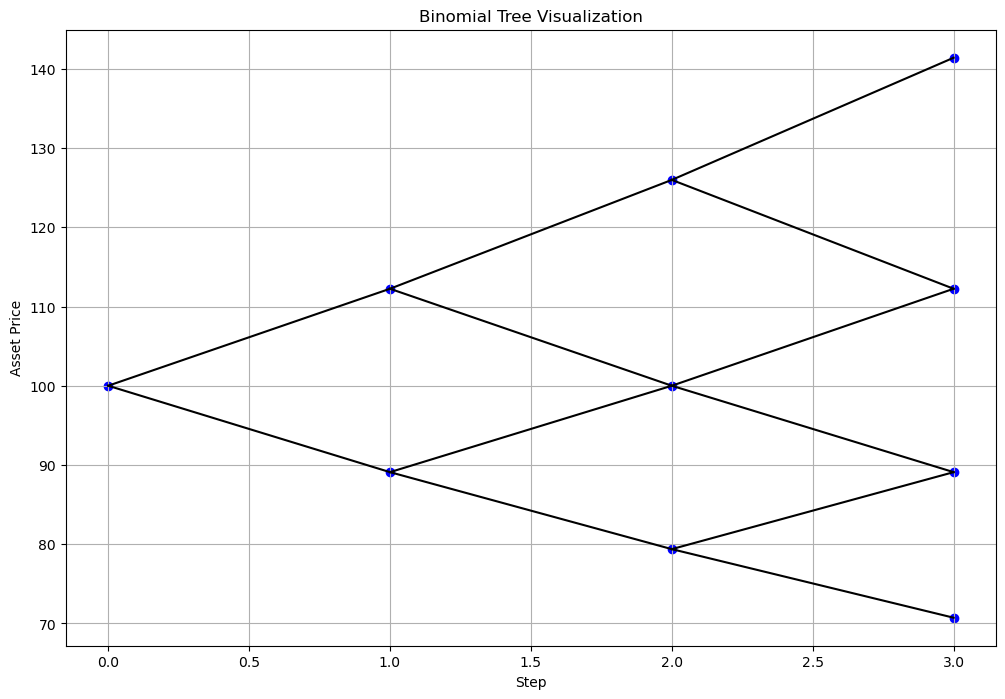

[[100.0, 112.24009024456676, 125.9783785810849, 141.39824580805166], [0, 89.09472522884107, 100.0, 112.24009024456676], [0, 0, 79.37870063602689, 89.09472522884107], [0, 0, 0, 70.72223522189248]]
5.664696201726381


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math



def binomial_tree_structure(S0, K, T, r, sigma, N, option_type='call', dividend_yield=0):
    """
    Calculate the American option price and return the binomial tree structure for visualization.

    :param S0: Initial stock price
    :param K: Strike price of the option
    :param T: Time to maturity (in years)
    :param r: Risk-free interest rate (annual)
    :param sigma: Volatility of the underlying stock
    :param N: Number of steps in the binomial tree
    :param option_type: Type of the option ('call' or 'put')
    :param dividend_yield: Continuous dividend yield
    :return: Tuple (Option price, Binomial Tree Structure)
    """
    dt = T / N
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    p = (math.exp((r - dividend_yield) * dt) - d) / (u - d)

    # Constructing the binomial tree for underlying asset prices
    asset_prices = [[0 for _ in range(N + 1)] for _ in range(N + 1)]
    for i in range(N + 1):
        for j in range(i + 1):
            asset_prices[j][i] = S0 * (u ** (i - j)) * (d ** j)

    # Initializing the option values at maturity
    option_values = [0 for _ in range(N + 1)]
    for i in range(N + 1):
        if option_type == 'call':
            option_values[i] = max(asset_prices[i][N] - K, 0)
        else:
            option_values[i] = max(K - asset_prices[i][N], 0)

    # Calculating option price at each node of the binomial tree
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            hold = math.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])
            exercise = max(asset_prices[j][i] - K, 0) if option_type == 'call' else max(K - asset_prices[j][i], 0)
            option_values[j] = max(hold, exercise)

    return option_values[0], asset_prices

def plot_binomial_tree(tree, N):
    """
    Plot the binomial tree.

    :param tree: Binomial tree structure (asset prices at each node)
    :param N: Number of steps in the binomial tree
    """
    plt.figure(figsize=(12, 8))
    for i in range(N + 1):
        for j in range(i + 1):
            plt.scatter(i, tree[j][i], color='blue')
            if i < N:
                plt.plot([i, i+1], [tree[j][i], tree[j][i+1]], color='black')
                plt.plot([i, i+1], [tree[j][i], tree[j+1][i+1]], color='black')

    plt.title('Binomial Tree Visualization')
    plt.xlabel('Step')
    plt.ylabel('Asset Price')
    plt.grid(True)
    plt.show()

# Testing the visualization with the binomial tree
option_price, binomial_tree = binomial_tree_structure(100, 110, 1, 0.05, 0.2, 3, 'call')
plot_binomial_tree(binomial_tree, 3)
print (binomial_tree)
print(option_price)



In [2]:
import ipywidgets as widgets
from IPython.display import display

# Function to update the plot and option price based on inputs
def update_plot(S0, K, T, r, sigma, N, option_type):
    option_price, binomial_tree = binomial_tree_structure(S0, K, T, r, sigma, N, option_type)
    plot_binomial_tree(binomial_tree, N)
    print(f"Option Price: {option_price:.2f}")

# Creating interactive widgets
S0_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Stock Price (S0):')
K_slider = widgets.FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K):')
T_slider = widgets.FloatSlider(value=1, min=0.1, max=2, step=0.1, description='Time to Maturity (T):')
r_slider = widgets.FloatSlider(value=0.05, min=0, max=0.2, step=0.01, description='Risk-free Rate (r):')
sigma_slider = widgets.FloatSlider(value=0.2, min=0.1, max=0.4, step=0.01, description='Volatility (σ):')
N_slider = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Steps (N):')
option_type_dropdown = widgets.Dropdown(options=['call', 'put'], value='call', description='Option Type:')

# Interactive output
interactive_plot = widgets.interactive_output(update_plot, {'S0': S0_slider, 'K': K_slider, 'T': T_slider, 
                                                            'r': r_slider, 'sigma': sigma_slider, 'N': N_slider, 
                                                            'option_type': option_type_dropdown})

# Displaying the widgets
widgets.VBox([S0_slider, K_slider, T_slider, r_slider, sigma_slider, N_slider, option_type_dropdown, interactive_plot])
